# Pokemon Type and Stats
### By Dani DiPinto
#### DS-SEA- 06

## 1.   Introduction and Background

 Nintendo released the games Pokemon Red and Pokemon Green for Gameboy Japan in 1996. Soon after, They were released in America as Pokemon Red and Pokemon Blue, with a Special Edition of Pokemon Yellow soon after.  In this first generation of Pokemon Games, to fill your pokedex, you had to collect all 150 Pokemon (or 151 including Mew).  Each of these Pokemon had a type and specific base stat that made it strong or weak against other Pokemon.  
<br>
With each new game release, or new Generation of Pokemon, new pokemon and pokemon types are added to the list of existing ones.  With the latest generation-- Generation VII, there are 802 Pokemon and 18 types.  Currently, since Pokemon can have a primary and secondary type, there are 146 combinations.
<br>
<br>
In the games, in addition to finding and collecting all the different types of Pokemon, your goal as a trainer was to become the Pokemon Master.  To do this, you battled your pokemon against others, developing strategies.  The easiest way to do this, is by knowing the type advantage (ex, fire is weak against water).  However, each pokemon has different stats, like health points, attack and defense.  This is why it is interesting to see how the base stats relates to the pokemon type.  I started playing Pokemon games when I was about 9 years old, and would love to find out if there are (or aren’t any correlations here.  
<br>
Predicting the primary and secondary type is a bit out of scope for this project, so for the purpose of this project, we will be looking at Primary type only.
<br>
If you want more information on Pokemon types or stats, you can view them here on the [Bulbapedia](http://bulbapedia.bulbagarden.net/wiki/Main_Page ) page.

## 2.  Problem Statement and Hypothesis:
<br>
By comparing the pokemon base stats (including HP, attack, special attack, defense, special defense, and speed) we can predict the pokemon’s type. 
<br>
As I mentioned before, I will only be looking to find the Primary type or (Type_1 in this dataset).  It will be interesting to see how predicting (or not) the base stats of different Pokemon are. 

## 3. The Data
<br>
This data was found on [Kaggle](https://www.kaggle.com/abcsds/pokemon), and it is mentioned that the Kaggle user created the dataset from using a Pokemon website called [Bulbapedia](http://bulbapedia.bulbagarden.net/wiki/Main_Page).  


In [379]:
#importing all the things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import metrics

In [380]:
#import pokemon data into a df
url = '/Users/Danielle/Desktop/Pokemon/Pokemon.csv'
df = pd.read_csv (url)

In [381]:
#first look at the top 5 rows
df.head()

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [382]:
#and the bottom 5 rows
df.tail()

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [383]:
#looking at the shape of the data frame
df.shape

(800, 13)

The dataset is very clean as is.  It has 801 rows and 13 columns. However, we really don't need the "legendary" column for this project, so I'm going to remove that in order to save some time and space, and clean up the df

In [384]:
del df['Legendary']

In [385]:
#checking the shape again :)
print df.shape

(800, 12)


In [386]:
#going to take a look at the value counts of Type_1
df.Type_1.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type_1, dtype: int64

In [387]:
#and the same with Type_2
df.Type_2.value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Water       14
Ghost       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type_2, dtype: int64

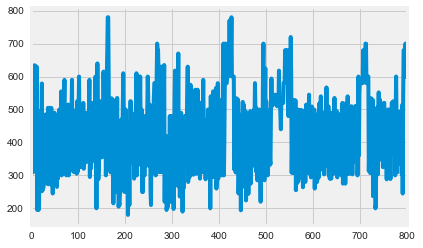

In [388]:
#plotting a graph to see total stats for all pokemon.  obviously there is a lot of difference between them
df.Total.plot()

In [389]:
#need to give types a numeriv value to be able to plot and use for KNN later, maybe other models
df['Type_1'] = df.Type_1.map({'Water':0, 'Normal':1, 'Grass':2, 'Bug':3, 'Psychic':4, 'Fire':5, 'Electric':6, 'Rock':7, 'Ground':8, 'Ghost':9, 'Dragon':10, 'Dark':11, 'Poison':12, 'Fighting':13, 'Steel':14, 'Ice':15, 'Fairy':16, 'Flying':17})

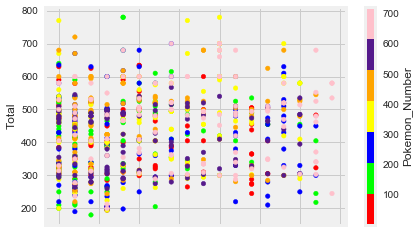

In [390]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#ffff00', '#FFA500', '#551a8b', '#FFC0CB'])

# create a scatter plot of TOTAL versus Type_1 and color by Pokemon_Number
df.plot(kind='scatter', x='Type_1', y='Total', c='Pokemon_Number', colormap=cmap_bold) 
#in the chart below, we want to look at the types in each generation

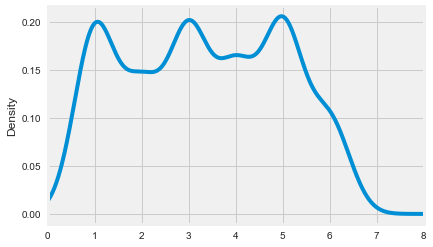

In [391]:
df.Generation.plot(kind='density', xlim=(0, 8))
#view new pokemon over generations
#df does not include gen 7, so thats why it drops there.  there isn't gen 8 yet

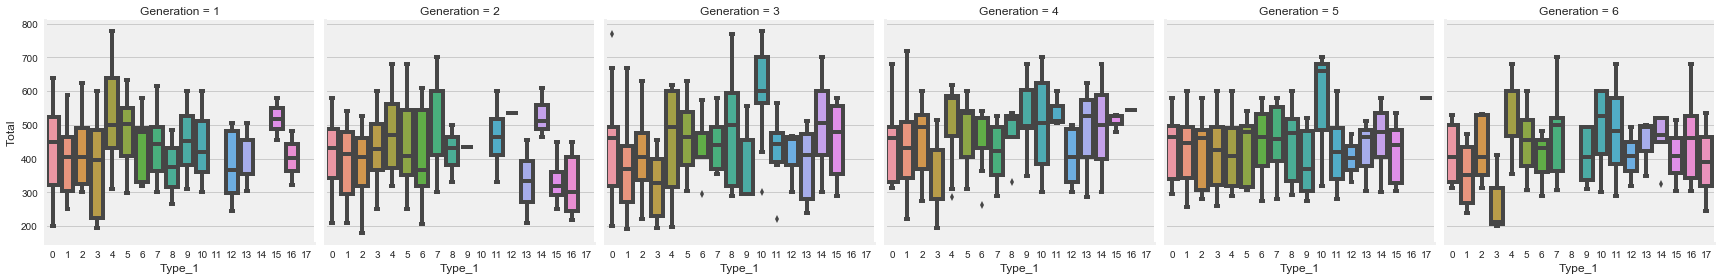

In [392]:
sns.factorplot(
    col='Generation',
    x='Type_1',
    y='Total',
    data=df,
    kind='box' 
)
#look at total metric across generations

In [393]:
df.Total.describe()
#looking at the stats for "Total"

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: Total, dtype: float64

#### Exploring the Data some more...
<br>
Below I am going to graph the stats by pokemon number.  The x axis will be pokemon number, and the y axis will be the stat (attack, defense, HP, speed, special defense, special attack).

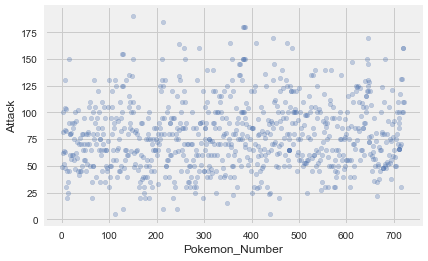

In [394]:
# add transparency
df.plot(kind='scatter', x='Pokemon_Number', y='Attack', alpha=0.3)
#Viewing Attack

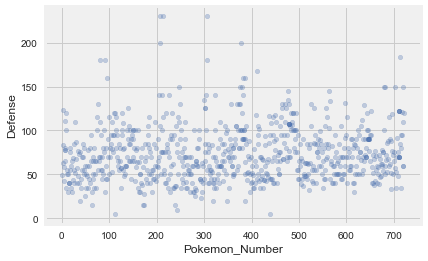

In [395]:
df.plot(kind='scatter', x='Pokemon_Number', y='Defense', alpha=0.3)
#Viewing Defense

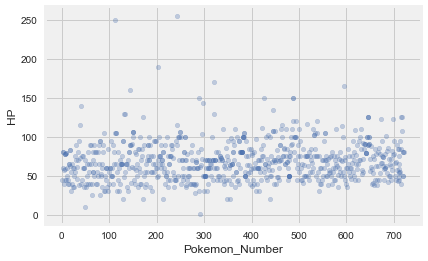

In [396]:
df.plot(kind='scatter', x='Pokemon_Number', y='HP', alpha=0.3)
#Viewing HP

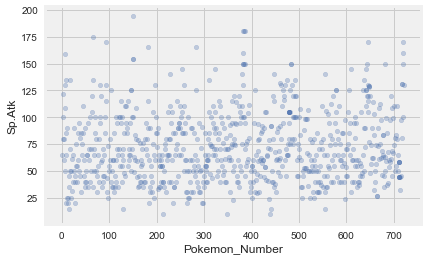

In [397]:
df.plot(kind='scatter', x='Pokemon_Number', y='Sp.Atk', alpha=0.3)
#Viewing Special Attack

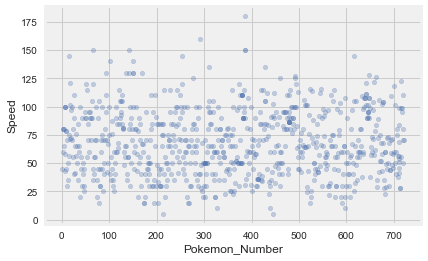

In [398]:
df.plot(kind='scatter', x='Pokemon_Number', y='Speed', alpha=0.3)
#Viewing Speed

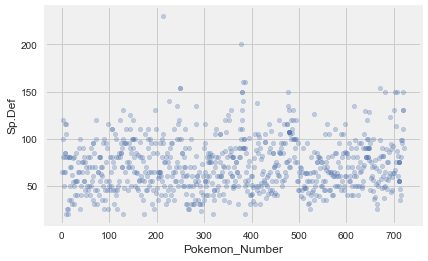

In [399]:
df.plot(kind='scatter', x='Pokemon_Number', y='Sp.Def', alpha=0.3)
#viewing Special Defense

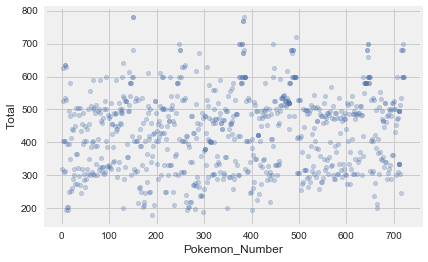

In [400]:
df.plot(kind='scatter', x='Pokemon_Number', y='Total', alpha=0.3)
#Viewing Total

Now I'm going to print a scatter matrix to see if any of the above stats (not including total) seem to correlate with each other

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130b41b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x137e44990>]], dtype=object)

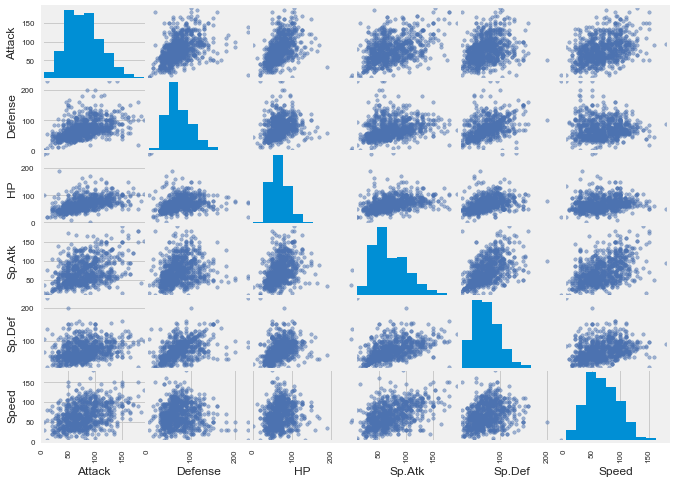

In [401]:
pd.scatter_matrix((df[['Attack', 'Defense', 'HP', 'Sp.Atk', 'Sp.Def', 'Speed']]), figsize=(10, 8))
#not using total in this

Defense and attack seem to show a correlation here, same with sp def and sp atk <br>
Some, like speed doesn't seem to have a huge correlation with others

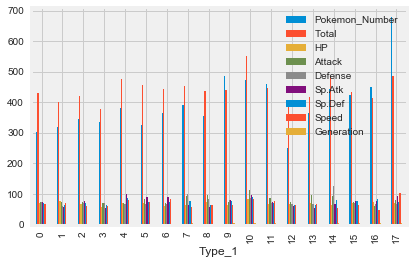

In [402]:
df.groupby('Type_1').mean().plot(kind='bar')

## 4.  Creating the Model
<br>
### Step 1.  
<br>
Define X and y.
<br>
First, we’re going to define the features and check X
<br>
For this first part, I'm going to hold off on splitting the data, and we're going to use all the stats other than Total.

In [403]:
#Starting a KNN to see features versus type to determine strength in type1
# store feature matrix in "X"
feature_cols = ['Attack', 'Defense', 'HP', 'Sp.Atk', 'Sp.Def', 'Speed']
X = df[feature_cols]
print (X)

     Attack  Defense   HP  Sp.Atk  Sp.Def  Speed
0        49       49   45      65      65     45
1        62       63   60      80      80     60
2        82       83   80     100     100     80
3       100      123   80     122     120     80
4        52       43   39      60      50     65
5        64       58   58      80      65     80
6        84       78   78     109      85    100
7       130      111   78     130      85    100
8       104       78   78     159     115    100
9        48       65   44      50      64     43
10       63       80   59      65      80     58
11       83      100   79      85     105     78
12      103      120   79     135     115     78
13       30       35   45      20      20     45
14       20       55   50      25      25     30
15       45       50   60      90      80     70
16       35       30   40      20      20     50
17       25       50   45      25      25     35
18       90       40   65      45      80     75
19      150       40

In [404]:
# store response vector in "y"
y = df.Type_1
print(y)

0       2
1       2
2       2
3       2
4       5
5       5
6       5
7       5
8       5
9       0
10      0
11      0
12      0
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28     12
29     12
       ..
770    16
771    13
772     6
773     7
774    10
775    10
776    10
777    14
778     9
779     9
780     9
781     9
782     9
783     9
784     9
785     9
786     9
787     9
788    15
789    15
790    17
791    17
792    16
793    11
794    10
795     7
796     7
797     4
798     4
799     5
Name: Type_1, dtype: int64


In [405]:
# check X's type
print type(X)
print type(X.values)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [406]:
# check X's shape (n = number of observations, p = number of features)
print X.shape

(800, 6)


In [407]:
# check y's shape (single dimension with length n)
print y.shape

(800,)


### Step 2.
<br>
My next step is to import KNN Classifier from Sklearn.  This is the “Importing the Estimator” portion.

In [408]:
#Step 2: Decide on the estimator you want to to use and import that class
from sklearn.neighbors import KNeighborsClassifier

### Step 3.
<br>
The next step is to instantiate the estimator


In [409]:
#Step 3: "Instantiate" the "estimator"
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [410]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


### Step 4.  
<br>
Fit the model

In [411]:
#Step 4: Fit the model with data (not using testing/training yet)
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Step. 5
<br>
 Predict the response for a new observation
<br>
Since this dataset only includes gen 1-6, I'm going to use pokemon (with only 1 type) from gen 7.  These will be my 'testing data' for this model.  I'll go through later with test/train split to increase accuracy. 

In [412]:
#Step 5: Use the model to predict the response for a new observation
#this data only goes through Gen VI, using pkmn from VII to have knn predict type_1
#Grass: Fomantis num 753, 
#Attack55,Defense35,HP40,Sp.Atk50,Sp.Def35,Speed35....looking for type #2 grass
#Electric: Xurkitree num 796
#Attack89,Defense71,HP 83,Sp.Atk173,Sp.Def71,Speed83....looking for type #6 electric
#Psychic: Necrozma num 800
#Attack107,Defense101,HP97,Sp.Atk127,Sp.Def89,Speed79....looking for type #4 psychic
new_observation = [[55, 35, 40, 50, 35, 35], [89, 71, 83, 173, 71, 83], [107, 101, 97, 127, 89, 79]]
knn.predict(new_observation)


array([3, 6, 5])

In [413]:
#3 is bug, not too far from grass.. 
#6 is on point with the prediction of electric! yay!
#5 is fire, this one is a bit more off

In [414]:
#adding a new pokemon- dragon type Jangmo-o num 782 - should be type 10
#adding water, Pyukumuku, num 771 should be type 0
X_new = [[55, 35, 40, 50, 35, 35], [89, 71, 83, 173, 71, 83], [107, 101, 97, 127, 89, 79], [55, 65, 45, 45, 45, 45], [60, 130, 55, 30, 130, 5]]
knn.predict(X_new)


array([3, 6, 5, 0, 9])

In [415]:
#predict probability
knn.predict_proba

<bound method KNeighborsClassifier.predict_proba of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')>

### Step 6.
<br>
Evaluate First model.

In [416]:
#Step 6: Evaluate the error or accuracy of the model--measure accuracy/cross validation 
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 5, 5, 0, 7])

In [417]:
# calculate predicted probabilities of class membership
knn.predict_proba(X_new)

array([[ 0. ,  0.2,  0. ,  0.2,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,
         0.2,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.2,  0. ,  0. ,  0. ,  0.4,  0.2,  0. ,  0. ,  0. ,  0. ,
         0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0.2,  0. ,  0. ,  0. ,  0. ,
         0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.2,  0. ,  0.2,  0.2,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,
         0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0.6,  0. ,  0.2,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [418]:
#not as useful with k=5 as k=1

### Trying some new things...
<br>
Next, I'm going to use a decision tree to check on what might be the more important stats to use as my features.  Narrowing the features a bit may help to increase the accuracy.

In [419]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor 
#choose model
treereg = DecisionTreeRegressor(random_state=1)
treereg

# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth = 3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [420]:
# use cross-validation to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))


6.9837090723415445

In [421]:
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

5.0199406277102891

In [422]:
#try with a loop to find best num of splits from 1 to 7
# list of values to try
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use CV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

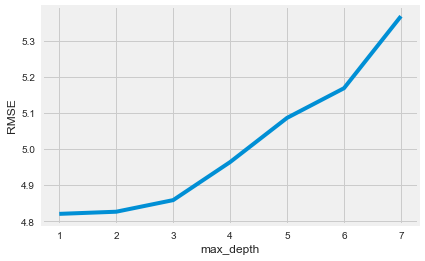

In [423]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')

In [424]:
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [425]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})
#so far, I'm seeing attack and defense as the most important.

,feature,importance
0,Attack,0.265159
1,Defense,0.734841
2,HP,0.000000
3,Sp.Atk,0.000000
4,Sp.Def,0.000000
5,Speed,0.000000


In [426]:
# create a Graphviz file

from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_pkmn.dot', feature_names=feature_cols)

The below image shows the results of the decision tree based on what it found as the most important features- attack and defense.  

![Tree for Pkmn data](pokemon/tree_pkmn.png)

![Pokemon Tree](https://github.com/danidipinto/Pokemon/blob/master/tree_pkmn.png "Pokemon Tree")

Next, I'm going to try clustering

In [427]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [311]:
# review the cluster labels
km.labels_

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0,
       1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1,
       1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0,

In [428]:
# save the cluster labels and sort by cluster
df['cluster'] = km.labels_
df.sort_values('Type_1')

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,cluster
714,647,KeldeoResolute Forme,0,Fighting,580,91,72,90,129,90,108,5,1
562,503,Samurott,0,NaN,528,95,100,85,108,70,70,5,1
381,349,Feebas,0,NaN,200,20,15,20,10,55,80,3,0
382,350,Milotic,0,NaN,540,95,60,79,100,125,81,3,1
98,91,Cloyster,0,Ice,525,50,95,180,85,45,70,1,2
97,90,Shellder,0,NaN,305,30,65,100,45,25,40,1,0
173,159,Croconaw,0,NaN,405,65,80,80,59,63,58,2,0
174,160,Feraligatr,0,NaN,530,85,105,100,79,83,78,2,2
94,87,Dewgong,0,Ice,475,90,70,80,70,95,70,1,2
93,86,Seel,0,NaN,325,65,45,55,45,70,45,1,0


In [429]:
# save the DataFrame of cluster centers
centers = df.groupby('cluster').mean()

In [430]:
type(centers)
#checking the type

pandas.core.frame.DataFrame

In [431]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [432]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

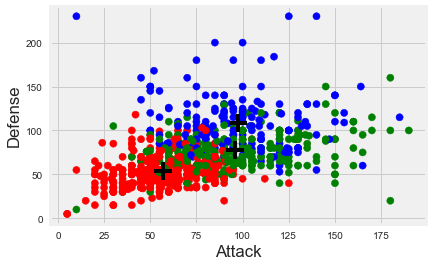

In [433]:
# scatter plot of defense versus attack, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df.Attack, df.Defense, c=colors[df.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.Attack, centers.Defense, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('Attack')
plt.ylabel('Defense')

In [434]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [435]:
X_scaled[:25]

array([[-0.92490618, -0.79715364, -0.95062622, -0.2391303 , -0.24818854,
        -0.80150318],
       [-0.5241302 , -0.34791742, -0.3628221 ,  0.21955954,  0.29115635,
        -0.28501525],
       [ 0.09244823,  0.29384863,  0.42091674,  0.83114599,  1.01028289,
         0.40363531],
       [ 0.64736882,  1.57738071,  0.42091674,  1.50389108,  1.72940942,
         0.40363531],
       [-0.83241942, -0.98968346, -1.18574787, -0.39202691, -0.78753344,
        -0.11285261],
       [-0.46247236, -0.50835893, -0.44119598,  0.21955954, -0.24818854,
         0.40363531],
       [ 0.15410607,  0.13340712,  0.34254285,  1.10635989,  0.47093799,
         1.09228588],
       [ 1.57223646,  1.19232109,  0.34254285,  1.74852566,  0.47093799,
         1.09228588],
       [ 0.7706845 ,  0.13340712,  0.34254285,  2.63532601,  1.54962779,
         1.09228588],
       [-0.9557351 , -0.28374081, -0.98981316, -0.69782014, -0.28414487,
        -0.87036824],
       [-0.49330128,  0.19758372, -0.40200904, -0.

In [436]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [437]:
# save the cluster labels and sort by cluster
df['cluster'] = km.labels_
df.sort_values('cluster')

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,cluster
0,1,Bulbasaur,2,Poison,318,45,49,49,65,65,45,1,0
285,262,Mightyena,11,NaN,420,70,90,70,60,60,70,3,0
284,261,Poochyena,11,NaN,220,35,55,35,30,30,35,3,0
583,524,Roggenrola,7,NaN,280,55,75,85,25,25,15,5,0
586,527,Woobat,4,Flying,313,55,45,43,55,43,72,5,0
280,258,Mudkip,0,NaN,310,50,70,50,50,50,40,3,0
588,529,Drilbur,8,NaN,328,60,85,40,30,45,68,5,0
277,256,Combusken,5,Fighting,405,60,85,60,85,60,55,3,0
276,255,Torchic,5,NaN,310,45,60,40,70,50,45,3,0
592,532,Timburr,13,NaN,305,75,80,55,25,35,35,5,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138b15310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x139eac050>]], dtype=object)

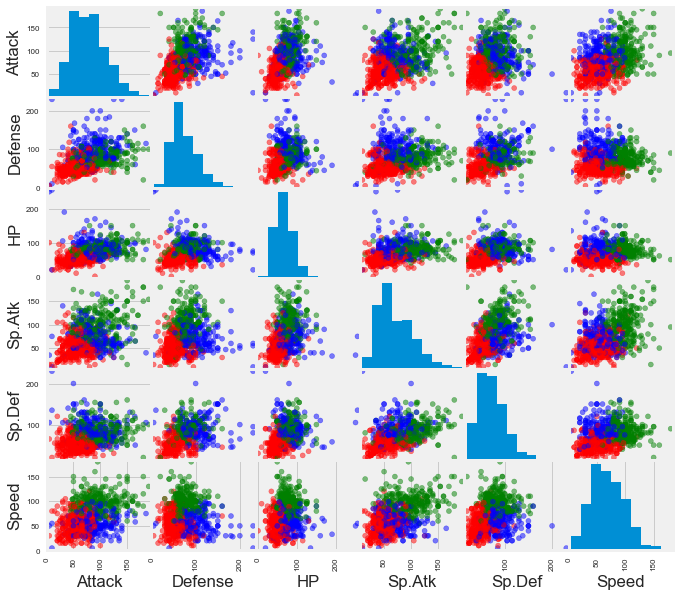

In [438]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[df.cluster], figsize=(10,10), s=100)

Again, I'm still seeing correlation with attack and defense.  There also may be a correlation between speed and either sp. def/ sp.atk.  HP doesn't seem to be giving us a lot here, however, the more HP a pokemon has, the higher the attack seems to be.

In [439]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.25693443308418629

In [440]:
# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

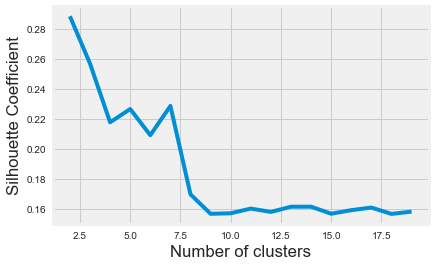

In [441]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [442]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
df['cluster'] = km.labels_
df.sort_values('cluster')

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,cluster
399,364,Sealeo,15,Water,410,90,60,70,75,70,45,3,0
470,423,Gastrodon,0,Ground,475,111,83,68,92,82,39,4,0
463,416,Vespiquen,3,Flying,474,70,80,102,80,102,40,4,0
460,413,WormadamTrash Cloak,3,Steel,424,60,69,95,69,95,36,4,0
459,413,WormadamSandy Cloak,3,Ground,424,60,79,105,59,85,36,4,0
458,413,WormadamPlant Cloak,3,Grass,424,60,59,85,79,105,36,4,0
456,411,Bastiodon,7,Steel,495,60,52,168,47,138,30,4,0
440,395,Empoleon,0,Steel,530,84,86,88,111,101,60,4,0
434,389,Torterra,2,Ground,525,95,109,105,75,85,56,4,0
433,388,Grotle,2,NaN,405,75,89,85,55,65,36,4,0


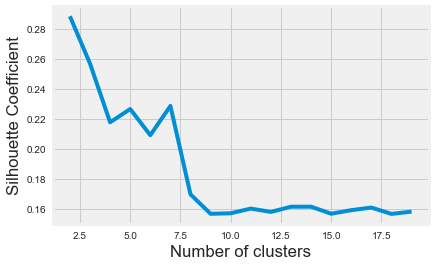

In [327]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

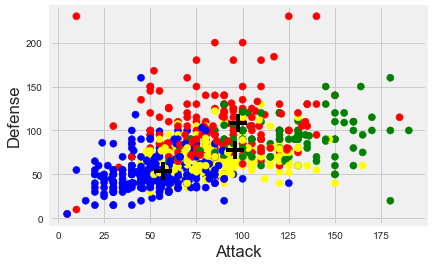

In [443]:

# scatter plot of defense versus attack, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df.Attack, df.Defense, c=colors[df.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.Attack, centers.Defense, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('Attack')
plt.ylabel('Defense')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139fc8310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13c8dd390>]], dtype=object)

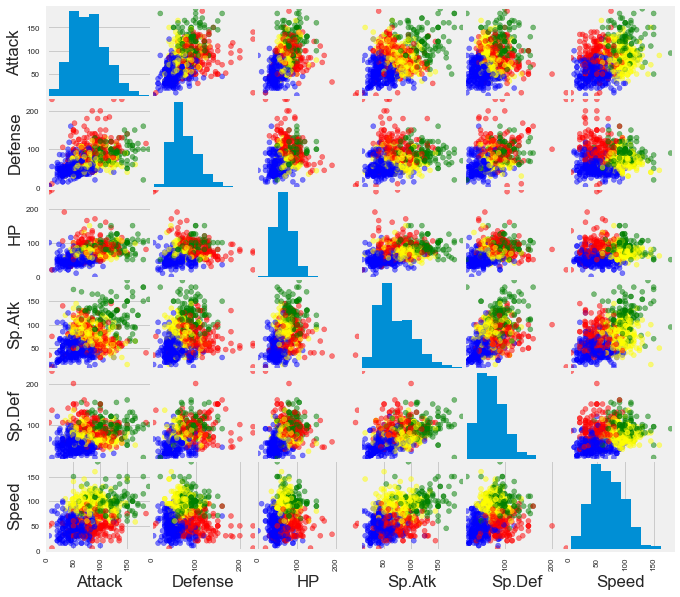

In [444]:
pd.scatter_matrix(X, c=colors[df.cluster], figsize=(10,10), s=100)

In [445]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [446]:
# review the cluster labels
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,
       -1, -1,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0, -1, -1, -1, -1,  1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1, -1, -1,  0

In [447]:
# save the cluster labels and sort by cluster
df['cluster'] = db.labels_
df.sort_values('cluster')

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,cluster
508,458,Mantyke,0,Flying,345,45,20,50,60,120,50,4,-1
123,115,Kangaskhan,1,NaN,490,105,95,80,40,80,90,1,-1
217,202,Wobbuffet,4,NaN,405,190,33,58,33,58,33,2,-1
125,116,Horsea,0,NaN,295,30,40,70,70,25,60,1,-1
126,117,Seadra,0,NaN,440,55,65,95,95,45,85,1,-1
691,630,Mandibuzz,11,Flying,510,110,65,105,55,95,80,5,-1
356,325,Spoink,4,NaN,330,60,25,35,70,80,60,3,-1
621,560,Scrafty,11,Fighting,488,65,90,115,45,115,58,5,-1
354,323,CameruptMega Camerupt,5,Ground,560,70,120,100,145,105,20,3,-1
131,122,Mr. Mime,4,Fairy,460,40,45,65,100,120,90,1,-1


In [448]:
# review the cluster centers
df.groupby('cluster').mean()

,Pokemon_Number,Type_1,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation
cluster,,,,,,,,,,
-1,333.243902,5.689024,501.524390,78.987805,89.652439,89.250000,83.500000,88.554878,71.579268,2.957317
0,364.485294,5.475490,410.501634,65.905229,74.949346,68.336601,68.661765,66.120915,66.527778,3.383987
1,418.200000,4.800000,590.000000,103.800000,125.400000,92.000000,75.800000,85.400000,107.600000,3.400000
2,529.500000,9.500000,687.500000,108.250000,160.000000,118.750000,115.000000,93.750000,91.750000,4.250000
3,479.000000,6.000000,520.000000,50.000000,65.000000,107.000000,105.000000,107.000000,86.000000,4.000000
4,497.750000,8.500000,685.000000,92.500000,122.500000,105.000000,152.500000,115.000000,97.500000,4.000000
5,693.000000,12.333333,673.333333,125.666667,130.666667,93.333333,130.666667,95.333333,97.666667,5.666667
6,620.000000,9.333333,515.000000,56.666667,51.666667,148.333333,58.333333,150.000000,50.000000,5.333333


In [449]:
## calculate SC this model
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)
metrics.silhouette_score(X_scaled, db.labels_)

-0.04079024808954259

In [450]:
db = DBSCAN(eps=1, min_samples=5)
db.fit(X_scaled)
metrics.silhouette_score(X_scaled, db.labels_)

0.026507286550217227

In [451]:
db = DBSCAN(eps=2, min_samples=4)
db.fit(X_scaled)
metrics.silhouette_score(X_scaled, db.labels_)

0.49701346536497754

Now I'm going to try everything with the test/train split

In [452]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [453]:
#before splitting
print X.shape

(800, 6)


In [454]:
# after splitting
print X_train.shape
print X_test.shape

(600, 6)
(200, 6)


In [455]:
# before splitting
print y.shape

(800,)


In [456]:
# after splitting
print y_train.shape
print y_test.shape

(600,)
(200,)


In [457]:
# WITHOUT a random_state parameter
X_train, X_test, y_train, y_test = train_test_split(X, y)
# print the first element of each object
print X_train.head(1)
print X_test.head(1)
print("")
print y_train.head(1)
print y_test.head(1)

    Attack  Defense  HP  Sp.Atk  Sp.Def  Speed
72      80       50  70      35      35     35
    Attack  Defense  HP  Sp.Atk  Sp.Def  Speed
47      80       70  75      65      75     90

72    13
Name: Type_1, dtype: int64
47    12
Name: Type_1, dtype: int64


In [458]:
# WITH a random_state parameter
#set random state to 1 to match earlier models 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# print the first element of each object
print X_train.head(1)
print X_test.head(1)
print("")
print y_train.head(1)
print y_test.head(1)

     Attack  Defense  HP  Sp.Atk  Sp.Def  Speed
132     110       80  70      55      80    105
   Attack  Defense  HP  Sp.Atk  Sp.Def  Speed
8     104       78  78     159     115    100

132    3
Name: Type_1, dtype: int64
8    5
Name: Type_1, dtype: int64


In [459]:
#try random forest
#notes in class 16,  Building and tuning decision trees and Random Forests section
#Each observation represents a pokemon 
#Goal: Predict pokemon type based on most important features

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [460]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []
                                 
# use 10-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [461]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

# list of values to try for max_depth
range_ = range(1, 60)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 10-fold cross-validation with each value of max_depth
for i in range_:
    rfreg = RandomForestClassifier(n_estimators=i, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

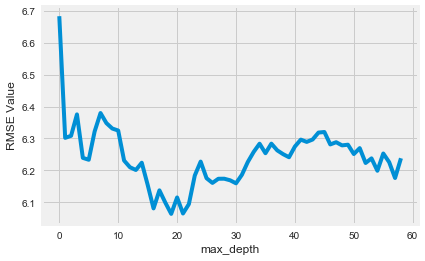

In [462]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot( RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE Value')

In [463]:
# best n score is 20/21


# list of values to try for max_depth
range_ = range(1, 60)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 10-fold cross-validation with each value of max_depth
for i in range_:
    rfreg = RandomForestClassifier(n_estimators=20, max_depth=i, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

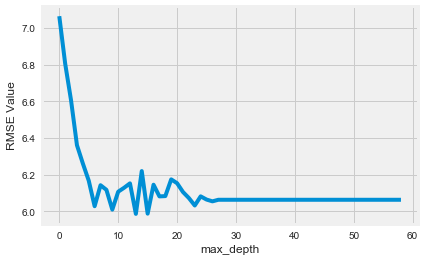

In [464]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot( RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE Value')
#best RMSE scores

In [465]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

#n estimator 21
#max depth 14
#rmse score 5.9

(5.9867982587083253, 14)

In [466]:
#split into testing and training data for random forst using classifier

treereg = RandomForestClassifier(n_estimators=21, max_depth=14, random_state=1)
treereg.fit(X_train, y_train)

#treereg will be a model
treereg.predict(X_test)

y_pred = treereg.predict(X_test)
#check accuracy, zip and make a 
min(zip(testing_error_rate, k_range))

(0.79000000000000004, 6)

In [467]:
#check knn below

In [468]:
#going to re-check our KNN with test_train split data
#also for classification random forests
#STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [469]:
# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [470]:
# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.145


In [471]:
#testing with neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)
#this one works better :)

0.21


In [472]:
# examine the class distribution
y_test.value_counts()

0     27
2     23
1     19
4     15
6     14
3     13
5     13
9     10
15     9
14     9
10     9
8      8
13     8
12     7
7      5
11     5
16     4
17     2
Name: Type_1, dtype: int64

In [473]:
#compute null accuracy
y_test.value_counts().head(1) / len(y_test)

0    0.135
Name: Type_1, dtype: float64

In [474]:
# calculate TRAINING Accuracy and TESTING accuracy for K=1 through 100
#
k_range = range(1, 101)
training_error_rate = []
testing_error_rate = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

# calculate training error
    knn.fit(X, y)
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error_rate.append(1 - training_accuracy)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error_rate.append(1 - testing_accuracy)

In [475]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [476]:
# create a DataFrame of K, training accuracy, and testing acc
column_dict = {'K': k_range, 'training error rate':training_error_rate, 'testing error rate':testing_error_rate}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.head()

,testing error rate,training error rate
K,,
1,0.855,0.01500
2,0.850,0.38750
3,0.845,0.49875
4,0.815,0.55500
5,0.790,0.56375


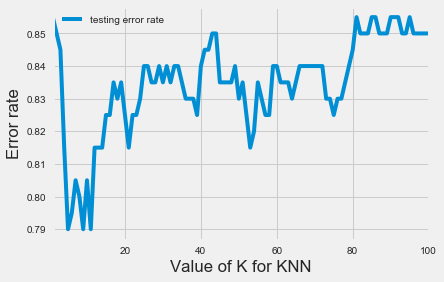

In [477]:
# plot the relationship between K (HIGH TO LOW) and TESTING Accuracy
df.plot(y='testing error rate')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate') #lower is better for this 

In [478]:
# find the minimum testing error and the associated K value
df.sort_values(by='testing error rate').head()

,testing error rate,training error rate
K,,
9,0.790,0.60250
5,0.790,0.56375
11,0.790,0.63250
6,0.795,0.56875
8,0.800,0.59500


In [487]:
# alternative method
min(zip(testing_error_rate, k_range))

(0.79000000000000004, 5)

In the above block, we printed out that the best number for K is 5.  Given a random Pokemon, using this model, we would get about 21% accuracy of predicting the Pokemon Type (Type_1) in our testing data.
<br>
<br>
With our training data (also on K =5), we get a corresponding training error of .56375, or an accuracy rate of 43.635%.
<br>
<br>
Next, we're going to plot the KNN model and compare the error rate of the testing data and the training data.
<br>


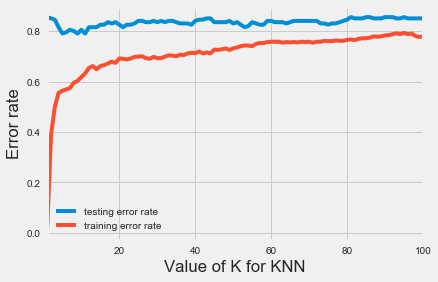

In [480]:
#Training error vs testing error# 
#plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate')

Now, we're going to try using Random Forest Classifier

In [481]:
#split into testing and training data for random forst using classifier

treereg = RandomForestClassifier(n_estimators=21, max_depth=14, random_state=1)
treereg.fit(X_train, y_train)

#treereg will be a model
treereg.predict(X_test)

y_pred = treereg.predict(X_test)
#check accuracy, zip and make a 
min(zip(testing_error_rate, k_range))

(0.79000000000000004, 5)

In [482]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
0,Attack,0.174248
3,Sp.Atk,0.173892
5,Speed,0.168631
2,HP,0.165213
1,Defense,0.163291
4,Sp.Def,0.154725


Using Random Forest Classifier, we find a different list of feature importance.

In [483]:
treereg.predict(X_test)
treereg.predict_proba(X_test)

array([[ 0.06122449,  0.        ,  0.04761905, ...,  0.00680272,
         0.        ,  0.        ],
       [ 0.33663004,  0.05451215,  0.13684649, ...,  0.0025641 ,
         0.04871795,  0.        ],
       [ 0.10204082,  0.10204082,  0.10204082, ...,  0.        ,
         0.        ,  0.00680272],
       ..., 
       [ 0.        ,  0.43650794,  0.04761905, ...,  0.        ,
         0.        ,  0.00793651],
       [ 0.14285714,  0.        ,  0.23809524, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10582011,  0.0952381 ,  0.04761905, ...,  0.00529101,
         0.        ,  0.04761905]])

## 5. Conclusion
<br>
The accuracy in this model isn't great.  We can predict Pokemon type 21% of the time based on the features/stats.  This information was first shown in the intial KNN model where I took stats from Gen VII to see what types it would predict.  With the Test/Train Split, we used training data from the dataset to create out model, and make predictions withe the testing data.  I used a decision tree to see what would be considered the more important features, and it gave us data that for the most part, matched the scatter matrix that was printed in the earlier portion where we looked at the data.  With the Random Forest model, we were able to determine the percentage of different important features and look at null accuracy.
<br>
<br>
On the bright side, with an accuracy rate of 21%, that means that pokemon stats may be more evenly spread over the different types.  For example, in the game, it's not a great idea to use all pokemon of one type.  It is best to have a variety of types.  You can have strong or weak pokemon in each type category- Type is not the only indicator of strength or weakness.  